In [1]:
from environment.models.simple import SimpleEnv

import tqdm
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

env = SimpleEnv()


2024-03-20 14:28:09.841616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 14:28:10.004208: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


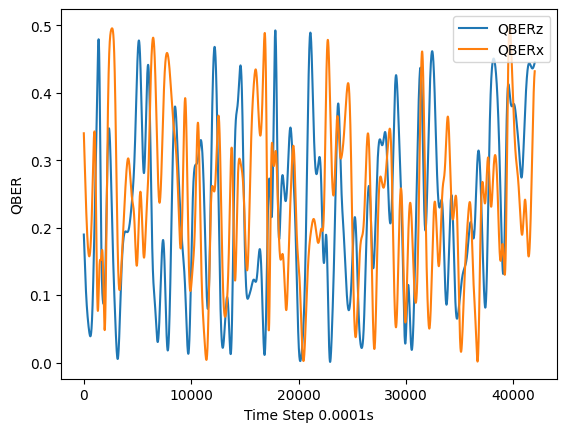

In [7]:
env.simulate(reset=False)

QBER = env.get_QBER()
PHI = env.get_phi()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

In [8]:
split = .8
train_test_margin = .1
# Split the data into training and testing sets
phi_train = PHI[:int(len(PHI)*split)]
phi_test = PHI[int(len(PHI)*(split-train_test_margin)):]

QBERs_train = QBER[:int(len(QBER)*split)]
QBERs_test = QBER[int(len(QBER)*(split-train_test_margin)):]

# Prepare the input data for RNN
phi_train = phi_train.reshape(phi_train.shape[0], 1, phi_train.shape[1])
phi_test = phi_test.reshape(phi_test.shape[0], 1, phi_test.shape[1])
QBERs_train = QBERs_train.reshape(QBERs_train.shape[0], 1, QBERs_train.shape[1])
QBERs_test = QBERs_test.reshape(QBERs_test.shape[0], 1, QBERs_test.shape[1])

In [21]:
from tqdm import tqdm

# define how many variables
num_inputs = 2

print(phi_train.shape)
# a model for each phi
models = []
# loop nr of phi angles to consider
for i in tqdm(range(PHI.shape[1]), desc="Training models"):
    # Define the architecture of the neural network
    model = keras.Sequential([
        keras.layers.LSTM(1024, activation='relu', input_shape=(None, num_inputs)),
        # keras.layers.Dropout(0.2),
        # keras.layers.LSTM(512, activation='relu', return_sequences=True),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=keras.optimizers.Adam(), loss='mean_squared_error')

    # Train the neural network
    model.fit(QBERs_train[:,:], phi_train[:,:,i], epochs=10, batch_size=100, verbose=1)
    
    models.append(model)

(33602, 1, 12)


Training models:   0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1/10
337/337 [==============================] - 7s 19ms/step - loss: 0.1898
Epoch 2/10
337/337 [==============================] - 6s 18ms/step - loss: 0.1828
Epoch 3/10
337/337 [==============================] - 6s 18ms/step - loss: 0.1828
Epoch 4/10
337/337 [==============================] - 6s 19ms/step - loss: 0.1828
Epoch 5/10
337/337 [==============================] - 6s 19ms/step - loss: 0.1828
Epoch 6/10
337/337 [==============================] - 6s 19ms/step - loss: 0.1828
Epoch 7/10
337/337 [==============================] - 7s 20ms/step - loss: 0.1828
Epoch 8/10
337/337 [==============================] - 7s 19ms/step - loss: 0.1828
Epoch 9/10
337/337 [==============================] - 6s 19ms/step - loss: 0.1828
Epoch 10/10
337/337 [==============================] - 6s 19ms/step - loss: 0.1828


Training models:   8%|▊         | 1/12 [01:05<11:58, 65.35s/it]

Epoch 1/10
337/337 [==============================] - 7s 20ms/step - loss: 1.5603
Epoch 2/10
337/337 [==============================] - 7s 20ms/step - loss: 1.5534
Epoch 3/10
337/337 [==============================] - 7s 19ms/step - loss: 1.5534
Epoch 4/10
337/337 [==============================] - 7s 20ms/step - loss: 1.5534
Epoch 5/10
337/337 [==============================] - 7s 19ms/step - loss: 1.5534
Epoch 6/10
337/337 [==============================] - 7s 20ms/step - loss: 1.5534
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 1.5534
Epoch 8/10
337/337 [==============================] - 7s 19ms/step - loss: 1.5534
Epoch 9/10
337/337 [==============================] - 7s 20ms/step - loss: 1.5534
Epoch 10/10
337/337 [==============================] - 7s 20ms/step - loss: 1.5534


Training models:  17%|█▋        | 2/12 [02:12<11:04, 66.41s/it]

Epoch 1/10
337/337 [==============================] - 7s 20ms/step - loss: 2.5657
Epoch 2/10
337/337 [==============================] - 7s 19ms/step - loss: 2.5567
Epoch 3/10
337/337 [==============================] - 6s 19ms/step - loss: 2.5567
Epoch 4/10
337/337 [==============================] - 6s 19ms/step - loss: 2.5567
Epoch 5/10
337/337 [==============================] - 7s 19ms/step - loss: 2.5546
Epoch 6/10
337/337 [==============================] - 6s 19ms/step - loss: 2.5567
Epoch 7/10
337/337 [==============================] - 7s 20ms/step - loss: 2.5567
Epoch 8/10
337/337 [==============================] - 6s 19ms/step - loss: 2.5567
Epoch 9/10
337/337 [==============================] - 7s 20ms/step - loss: 2.5567
Epoch 10/10
337/337 [==============================] - 7s 20ms/step - loss: 2.5567


Training models:  25%|██▌       | 3/12 [03:19<09:59, 66.62s/it]

Epoch 1/10
337/337 [==============================] - 7s 19ms/step - loss: 0.6465
Epoch 2/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6164
Epoch 3/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6145
Epoch 4/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6117
Epoch 5/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6106
Epoch 6/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6103
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6503
Epoch 8/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6506
Epoch 9/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6506
Epoch 10/10
337/337 [==============================] - 6s 19ms/step - loss: 0.6506


Training models:  33%|███▎      | 4/12 [04:24<08:48, 66.11s/it]

Epoch 1/10
337/337 [==============================] - 7s 18ms/step - loss: 2.8903
Epoch 2/10
337/337 [==============================] - 6s 18ms/step - loss: 2.8849
Epoch 3/10
337/337 [==============================] - 6s 18ms/step - loss: 2.8733
Epoch 4/10
337/337 [==============================] - 6s 18ms/step - loss: 2.8655
Epoch 5/10
337/337 [==============================] - 6s 18ms/step - loss: 2.8863
Epoch 6/10
337/337 [==============================] - 6s 18ms/step - loss: 2.8863
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8863
Epoch 8/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8863
Epoch 9/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8863
Epoch 10/10
337/337 [==============================] - 6s 18ms/step - loss: 2.8863


Training models:  42%|████▏     | 5/12 [05:28<07:36, 65.21s/it]

Epoch 1/10
337/337 [==============================] - 7s 19ms/step - loss: 6.6064
Epoch 2/10
337/337 [==============================] - 6s 19ms/step - loss: 6.4158
Epoch 3/10
337/337 [==============================] - 6s 19ms/step - loss: 6.4023
Epoch 4/10
337/337 [==============================] - 6s 18ms/step - loss: 6.3855
Epoch 5/10
337/337 [==============================] - 6s 18ms/step - loss: 6.3862
Epoch 6/10
337/337 [==============================] - 6s 19ms/step - loss: 6.3797
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 6.3797
Epoch 8/10
337/337 [==============================] - 6s 19ms/step - loss: 6.3808
Epoch 9/10
337/337 [==============================] - 6s 18ms/step - loss: 6.3714
Epoch 10/10
337/337 [==============================] - 6s 18ms/step - loss: 6.3836


Training models:  50%|█████     | 6/12 [06:31<06:28, 64.68s/it]

Epoch 1/10
337/337 [==============================] - 7s 19ms/step - loss: 2.8383
Epoch 2/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287
Epoch 3/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287
Epoch 4/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287
Epoch 5/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287
Epoch 6/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287
Epoch 8/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287
Epoch 9/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8283
Epoch 10/10
337/337 [==============================] - 6s 19ms/step - loss: 2.8287


Training models:  58%|█████▊    | 7/12 [07:36<05:23, 64.68s/it]

Epoch 1/10
337/337 [==============================] - 7s 19ms/step - loss: 1.9280
Epoch 2/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8898
Epoch 3/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8869
Epoch 4/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8853
Epoch 5/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8822
Epoch 6/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8799
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8764
Epoch 8/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8697
Epoch 9/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8632
Epoch 10/10
337/337 [==============================] - 6s 19ms/step - loss: 1.8508


Training models:  67%|██████▋   | 8/12 [08:41<04:18, 64.63s/it]

Epoch 1/10
337/337 [==============================] - 7s 19ms/step - loss: 2.4713
Epoch 2/10
337/337 [==============================] - 6s 19ms/step - loss: 2.4592
Epoch 3/10
337/337 [==============================] - 6s 19ms/step - loss: 2.4592
Epoch 4/10
337/337 [==============================] - 6s 19ms/step - loss: 2.4592
Epoch 5/10
337/337 [==============================] - 6s 19ms/step - loss: 2.4592
Epoch 6/10
337/337 [==============================] - 6s 19ms/step - loss: 2.4592
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 2.4592
Epoch 8/10
337/337 [==============================] - 6s 19ms/step - loss: 2.4592
Epoch 9/10
337/337 [==============================] - 7s 20ms/step - loss: 2.4592
Epoch 10/10
337/337 [==============================] - 7s 20ms/step - loss: 2.4592


Training models:  75%|███████▌  | 9/12 [09:47<03:15, 65.11s/it]

Epoch 1/10
337/337 [==============================] - 7s 20ms/step - loss: 0.4443
Epoch 2/10
337/337 [==============================] - 7s 19ms/step - loss: 0.4331
Epoch 3/10
337/337 [==============================] - 6s 19ms/step - loss: 0.4331
Epoch 4/10
337/337 [==============================] - 7s 19ms/step - loss: 0.4331
Epoch 5/10
337/337 [==============================] - 7s 19ms/step - loss: 0.4331
Epoch 6/10
337/337 [==============================] - 7s 19ms/step - loss: 0.4331
Epoch 7/10
337/337 [==============================] - 6s 19ms/step - loss: 0.4331
Epoch 8/10
337/337 [==============================] - 7s 19ms/step - loss: 0.4331
Epoch 9/10
337/337 [==============================] - 7s 20ms/step - loss: 0.4331
Epoch 10/10
337/337 [==============================] - 7s 19ms/step - loss: 0.4331


Training models:  83%|████████▎ | 10/12 [10:53<02:11, 65.58s/it]

Epoch 1/10
337/337 [==============================] - 7s 20ms/step - loss: 3.4921
Epoch 2/10
337/337 [==============================] - 7s 19ms/step - loss: 3.4240
Epoch 3/10
337/337 [==============================] - 7s 20ms/step - loss: 3.3627
Epoch 4/10
337/337 [==============================] - 6s 19ms/step - loss: 3.3432
Epoch 5/10
337/337 [==============================] - 7s 21ms/step - loss: 3.3403
Epoch 6/10
337/337 [==============================] - 7s 19ms/step - loss: 3.3426
Epoch 7/10
337/337 [==============================] - 7s 20ms/step - loss: 3.3317
Epoch 8/10
337/337 [==============================] - 7s 20ms/step - loss: 3.3287
Epoch 9/10
337/337 [==============================] - 7s 20ms/step - loss: 3.3435
Epoch 10/10
337/337 [==============================] - 7s 20ms/step - loss: 3.3350


Training models:  92%|█████████▏| 11/12 [12:01<01:06, 66.31s/it]

Epoch 1/10
337/337 [==============================] - 7s 19ms/step - loss: 0.8421
Epoch 2/10
337/337 [==============================] - 7s 20ms/step - loss: 0.8353
Epoch 3/10
337/337 [==============================] - 7s 20ms/step - loss: 0.8353
Epoch 4/10
337/337 [==============================] - 7s 19ms/step - loss: 0.8353
Epoch 5/10
337/337 [==============================] - 7s 19ms/step - loss: 0.8353
Epoch 6/10
337/337 [==============================] - 7s 19ms/step - loss: 0.8353
Epoch 7/10
337/337 [==============================] - 7s 20ms/step - loss: 0.8353
Epoch 8/10
337/337 [==============================] - 7s 20ms/step - loss: 0.8353
Epoch 9/10
337/337 [==============================] - 7s 20ms/step - loss: 0.8353
Epoch 10/10
337/337 [==============================] - 7s 19ms/step - loss: 0.8353


Training models: 100%|██████████| 12/12 [13:08<00:00, 65.74s/it]


In [22]:
phi_preds = []
for i in tqdm(range(PHI.shape[1]), desc="Predicting phis"):
    # Predict the QBER using the trained neural network
    phi_preds.append(models[i].predict(QBERs_test[:,:], batch_size=1))

# Convert the predicted_phi_move to a numpy array
phi_preds = np.array(phi_preds)

Training models:   0%|          | 0/12 [00:00<?, ?it/s]

12601/12601 [==============================] - 15s 1ms/step


Training models:   8%|▊         | 1/12 [00:17<03:09, 17.24s/it]

12601/12601 [==============================] - 15s 1ms/step


Training models:  17%|█▋        | 2/12 [00:33<02:44, 16.43s/it]

12601/12601 [==============================] - 24s 2ms/step


Training models:  25%|██▌       | 3/12 [01:00<03:12, 21.41s/it]

12601/12601 [==============================] - 28s 2ms/step


Training models:  33%|███▎      | 4/12 [01:29<03:14, 24.33s/it]

12601/12601 [==============================] - 21s 2ms/step


Training models:  42%|████▏     | 5/12 [01:53<02:50, 24.37s/it]

12601/12601 [==============================] - 57s 5ms/step


Training models:  50%|█████     | 6/12 [02:54<03:40, 36.78s/it]

12601/12601 [==============================] - 58s 5ms/step


Training models:  58%|█████▊    | 7/12 [03:55<03:42, 44.55s/it]

12601/12601 [==============================] - 15s 1ms/step


Training models:  67%|██████▋   | 8/12 [04:10<02:21, 35.43s/it]

12601/12601 [==============================] - 15s 1ms/step


Training models:  75%|███████▌  | 9/12 [04:27<01:28, 29.42s/it]

12601/12601 [==============================] - 15s 1ms/step


Training models:  83%|████████▎ | 10/12 [04:43<00:50, 25.33s/it]

12601/12601 [==============================] - 23s 2ms/step


Training models:  92%|█████████▏| 11/12 [05:09<00:25, 25.67s/it]

12601/12601 [==============================] - 55s 4ms/step


Training models: 100%|██████████| 12/12 [06:05<00:00, 30.45s/it]


In [28]:
# phi_preds = phi_preds.reshape(phi_preds.shape[2], phi_preds.shape[0])
phi_preds = np.squeeze(phi_preds)
print(phi_preds.shape)
# phi_test = phi_test.reshape(phi_test.shape[0], phi_test.shape[2])
phi_test = np.squeeze(phi_test)
print(phi_test.shape)

(12, 12601)
(12601, 12)


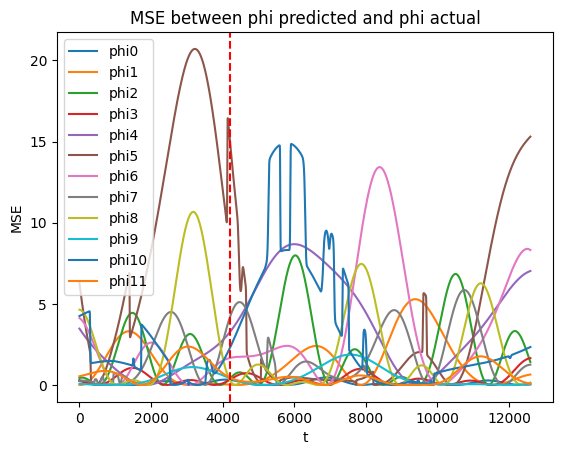

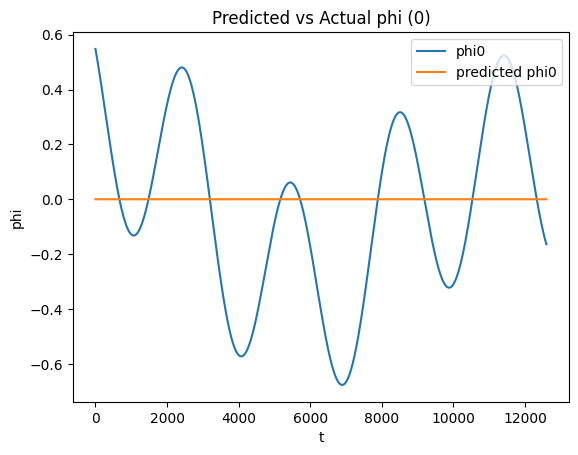

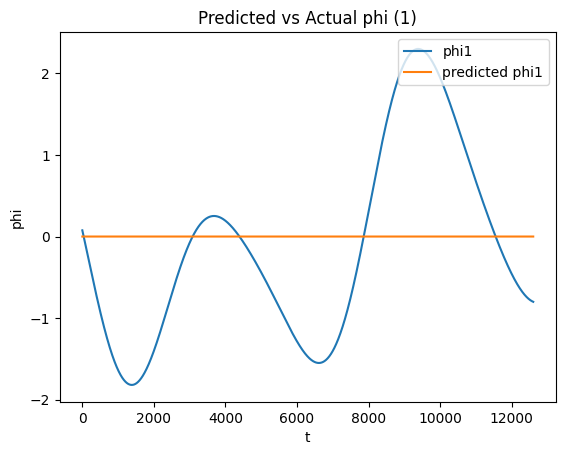

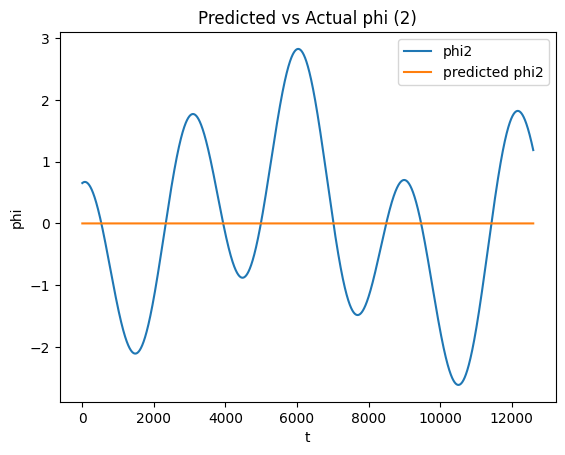

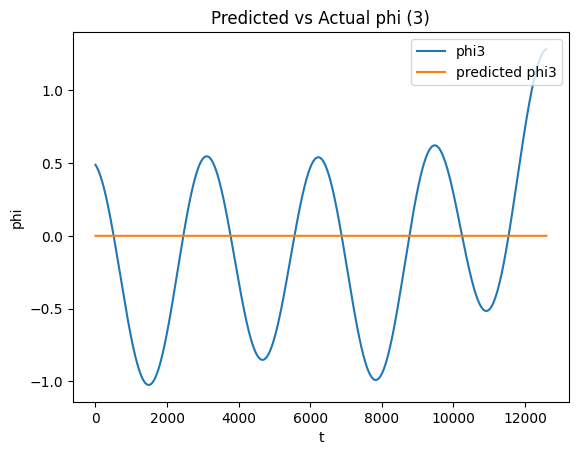

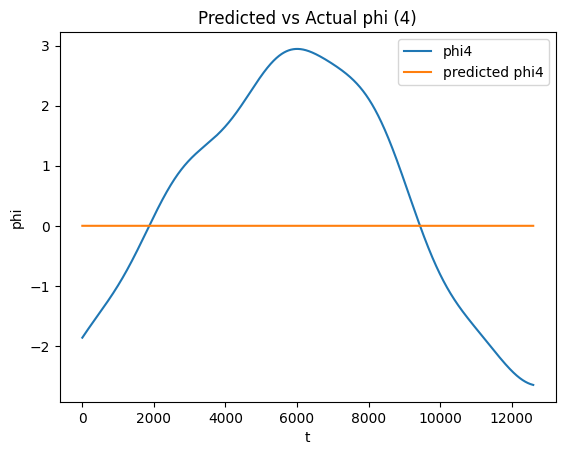

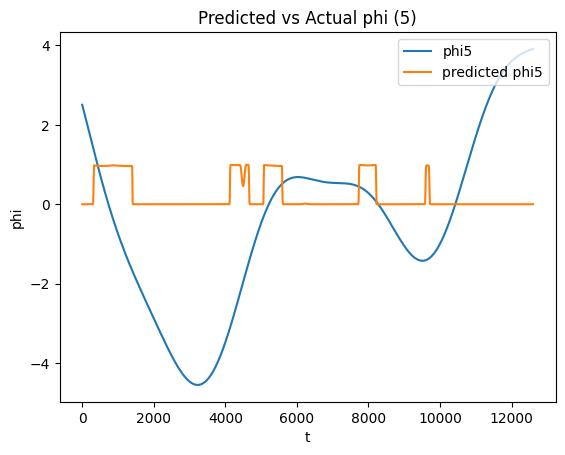

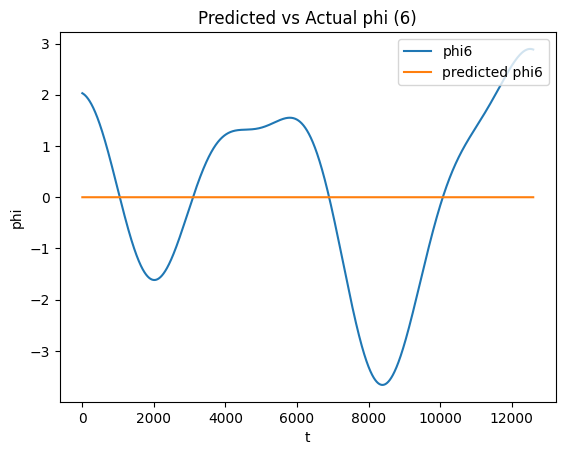

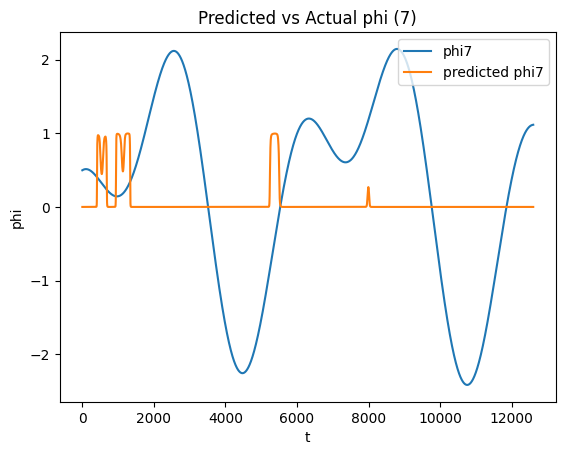

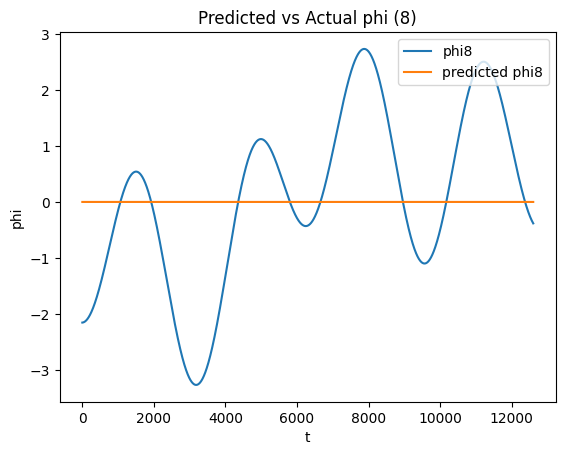

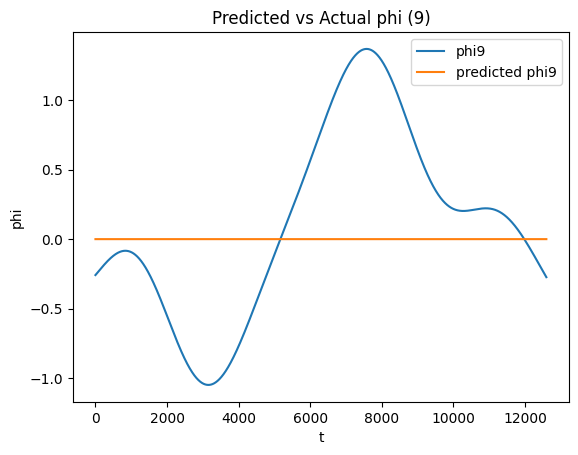

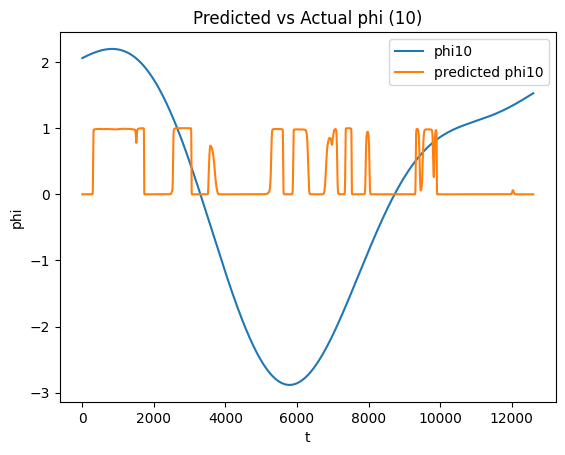

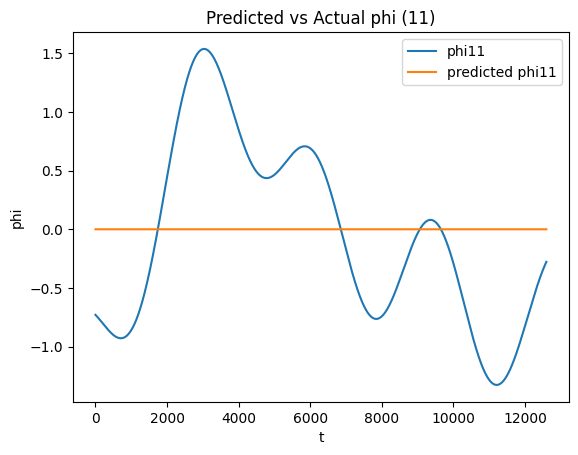

In [30]:
# Plot the MSE
for j in range(12):
    mse_values = []
    for i in range(len(phi_test)):
        mse = np.mean((phi_preds[j,i] - phi_test[i,j]) ** 2)
        mse_values.append(mse)

    plt.plot(mse_values)
plt.axvline(x=len(PHI) * 0.1, color='red', linestyle='--')
plt.xlabel('t')
plt.ylabel('MSE')
plt.legend(loc='upper left', labels=[f'phi{i}' for i in range(12)])
plt.title('MSE between phi predicted and phi actual')
plt.show()

phi_plot = np.array(PHI)
phi_test = np.array(phi_test)
phi_preds = np.array(phi_preds)
# # Plot the predicted and actual phi
for i in range(12):
    # plt.axvline(x=len(phi_plot) * 0.1, color='red', linestyle='--')
    plt.plot(phi_test[:,i], label=f'phi{i}')
    plt.plot(phi_preds[i,:], label=f'predicted phi{i}')
    plt.xlabel('t')
    plt.ylabel('phi')
    plt.legend(loc='upper right')
    plt.title(f'Predicted vs Actual phi ({i})')
    plt.show()

In [ ]:
QBER_2 = QBER.reshape(QBER.shape[0], 1, QBER.shape[1])
# Predict the QBER using the trained neural network
phi_preds = model.predict(QBER_2[:,:])
phi_preds = np.array(phi_preds)
phi_preds = phi_preds.reshape(phi_preds.shape[0], phi_preds.shape[2])

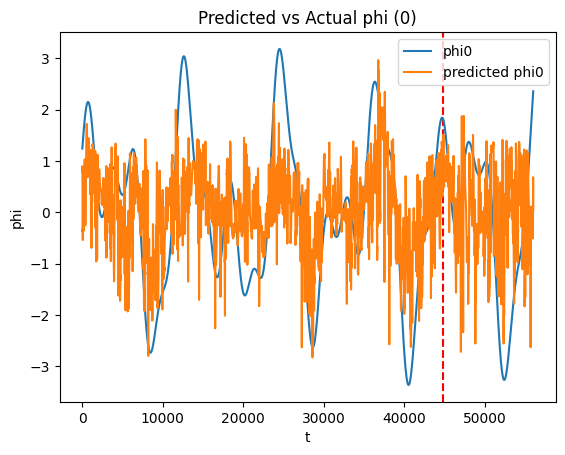

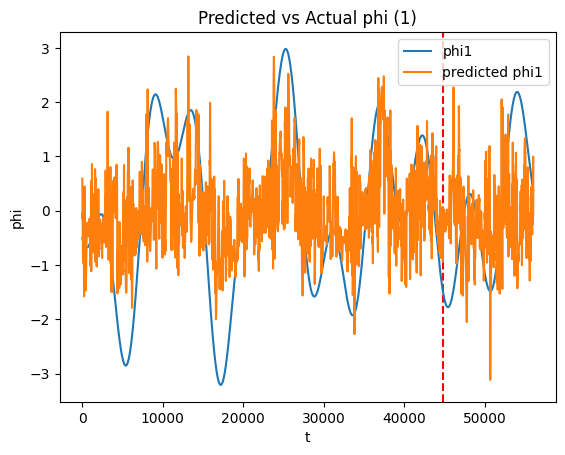

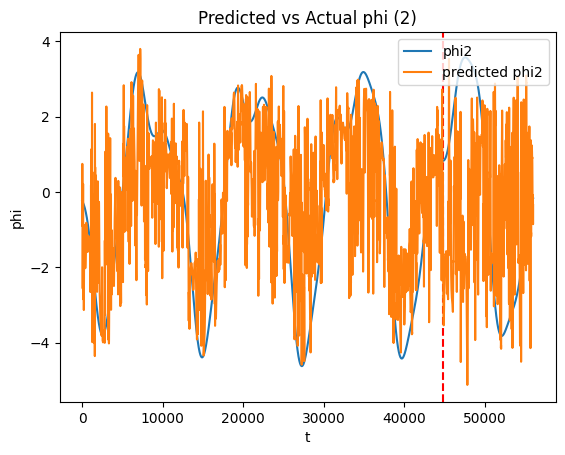

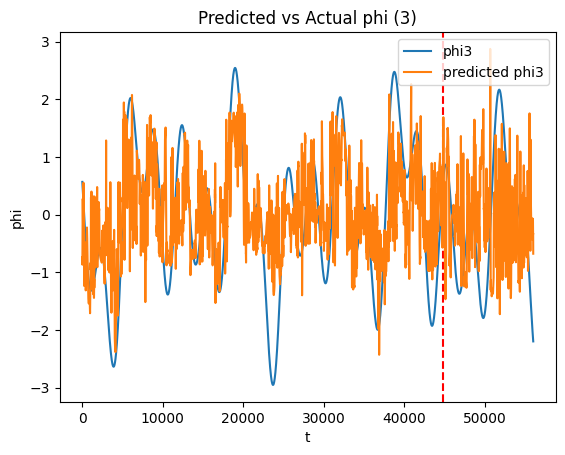

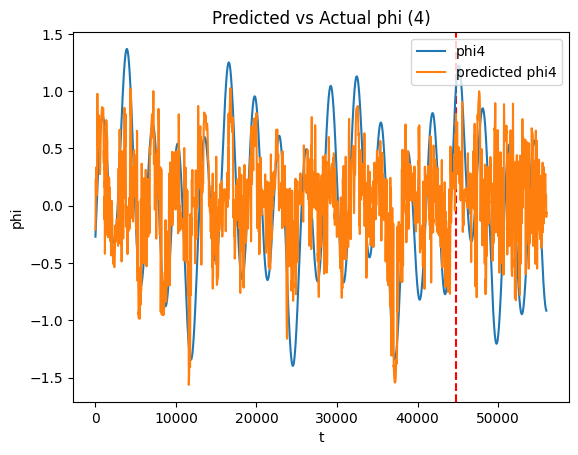

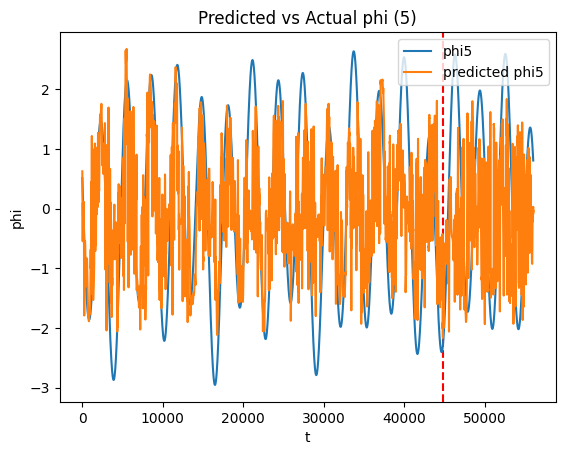

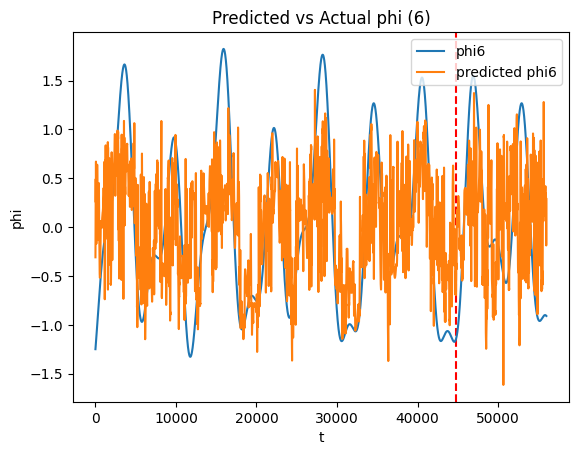

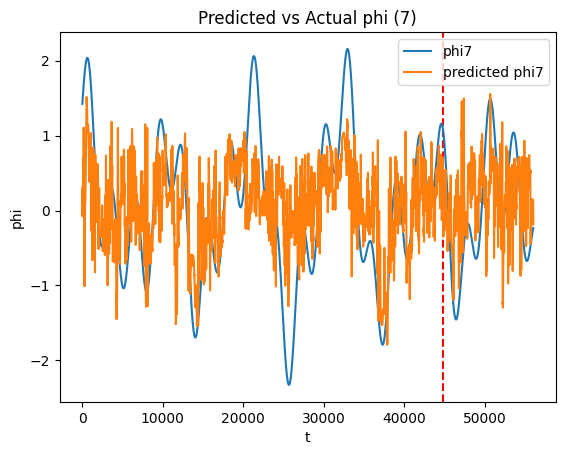

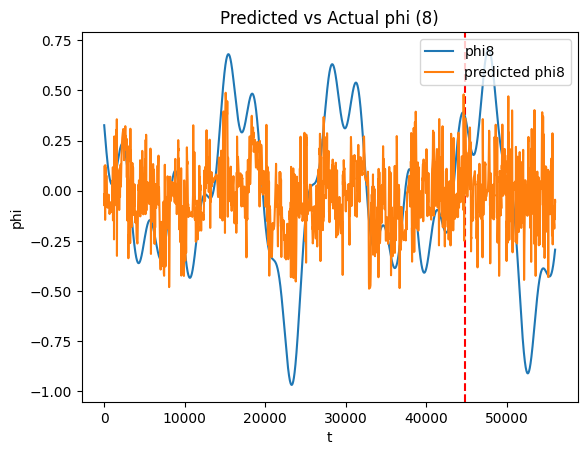

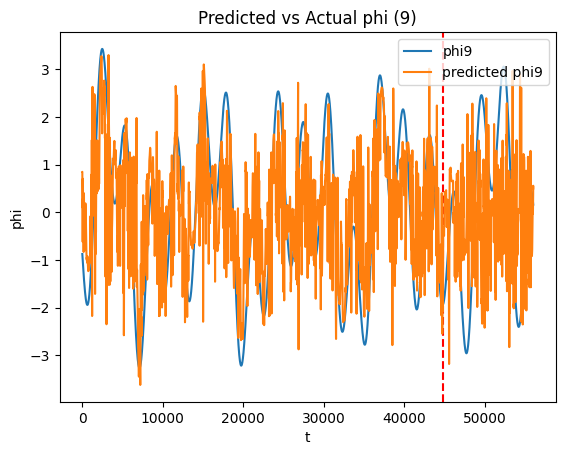

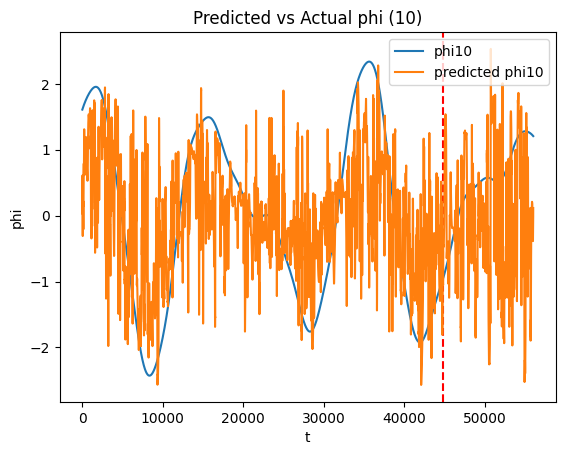

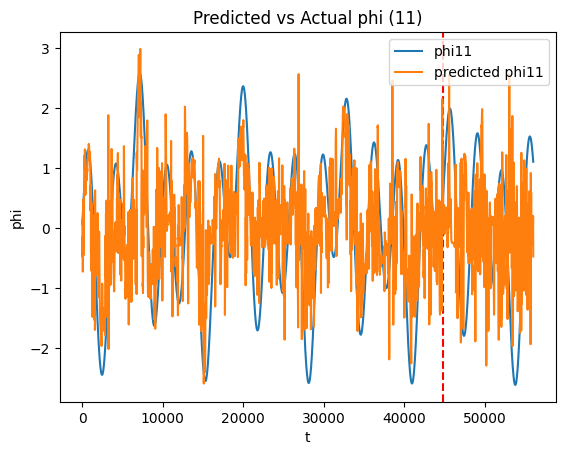

In [50]:

# # Plot the predicted and actual phi
for i in range(12):
    plt.axvline(x=len(phi_plot) * split, color='red', linestyle='--')
    plt.plot(PHI[:,i], label=f'phi{i}')
    plt.plot(phi_preds[:,i], label=f'predicted phi{i}')
    plt.xlabel('t')
    plt.ylabel('phi')
    plt.legend(loc='upper right')
    plt.title(f'Predicted vs Actual phi ({i})')
    plt.show()